In [1]:
import pandas as pd


In [8]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [10]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [11]:
import datetime

In [12]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [16]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,REGULAR,5554,271,2016-09-16 21:00:00
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,REGULAR,5554,271,2016-09-16 17:00:00
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,REGULAR,5554,271,2016-09-16 13:00:00
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,REGULAR,5554,271,2016-09-16 09:00:00
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,REGULAR,5554,271,2016-09-16 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00


In [15]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [23]:
(turnstiles_df .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  .ENTRIES.count()  .reset_index() .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


In [24]:
(turnstiles_df .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  .EXITS.count()  .reset_index() .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


In [25]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "08/27/2016")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,REGULAR,887689608,493419121,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,REGULAR,887690085,493419616,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,REGULAR,887690472,493420159,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,REGULAR,887690738,493420679,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,REGULAR,887690800,493420936,2016-08-27 04:00:00
1441,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,00:00:00,REGULAR,887690958,493420995,2016-08-27 00:00:00


In [48]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .first())

In [56]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,08/27/2016,NQR456,BMT,20:00:00,REGULAR,5800121,1966271,2016-08-27 20:00:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,NQR456,BMT,20:00:00,REGULAR,5800798,1966512,2016-08-28 20:00:00,08/27/2016,5800121.0,1966271.0
2,A002,R051,02-00-00,59 ST,08/29/2016,NQR456,BMT,20:00:00,REGULAR,5802336,1967033,2016-08-29 20:00:00,08/28/2016,5800798.0,1966512.0
3,A002,R051,02-00-00,59 ST,08/30/2016,NQR456,BMT,20:00:00,REGULAR,5803875,1967553,2016-08-30 20:00:00,08/29/2016,5802336.0,1967033.0
4,A002,R051,02-00-00,59 ST,08/31/2016,NQR456,BMT,20:00:00,REGULAR,5805383,1968026,2016-08-31 20:00:00,08/30/2016,5803875.0,1967553.0


In [50]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,08/27/2016,NQR456,BMT,20:00:00,REGULAR,5800121,1966271,2016-08-27 20:00:00
1,A002,R051,02-00-00,59 ST,08/28/2016,NQR456,BMT,20:00:00,REGULAR,5800798,1966512,2016-08-28 20:00:00
2,A002,R051,02-00-00,59 ST,08/29/2016,NQR456,BMT,20:00:00,REGULAR,5802336,1967033,2016-08-29 20:00:00
3,A002,R051,02-00-00,59 ST,08/30/2016,NQR456,BMT,20:00:00,REGULAR,5803875,1967553,2016-08-30 20:00:00
4,A002,R051,02-00-00,59 ST,08/31/2016,NQR456,BMT,20:00:00,REGULAR,5805383,1968026,2016-08-31 20:00:00


In [53]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['ENTRIES', 'EXITS']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,08/27/2016,56520135,32101556
1,A002,R051,59 ST,08/28/2016,56528031,32106682
2,A002,R051,59 ST,08/29/2016,56543493,32116538
3,A002,R051,59 ST,08/30/2016,56560115,32126521
4,A002,R051,59 ST,08/31/2016,56576672,32136494


In [54]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [55]:
turnstiles_daily[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "EXITS"]]
                                                       .shift(1))

In [57]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 194 <-- 1894869683.0
entries: 262183 <-- 67111299.0
entries: 63 <-- 1054429.0
entries: 2862 <-- 2044694.0
entries: 1912607049 <-- 7509132.0
entries: 285 <-- 1494569141.0
entries: 2542 <-- 14129479.0
entries: 67108864 <-- 0.0
entries: 335600216 <-- 1374824.0
entries: 36 <-- 3252790.0
entries: 1117 <-- 3665497.0
entries: 262269 <-- 10823938.0
entries: 1452 <-- 1460387.0
entries: 1154413610 <-- 8957775.0
entries: 100665773 <-- 35655801.0
entries: 1443 <-- 1014193.0
entries: 186916568 <-- 604712476.0
entries: 874 <-- 6130902.0
entries: 598 <-- 11078528.0
entries: 1160 <-- 74672293.0
entries: 0 <-- 117440532.0
entries: 100663296 <-- 1299.0
entries: 117440514 <-- 100663296.0
entries: 2123 <-- 9170483.0
entries: 428 <-- 2336204.0
entries: 1024 <-- 12498870.0


In [58]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

exits: 153 <-- 1777224891.0
exits: 65630 <-- 16781836.0
exits: 1778415824 <-- 6994638.0
exits: 122 <-- 135367260.0
exits: 172 <-- 12723165.0
exits: 16777218 <-- 405.0
exits: 201391476 <-- 803021.0
exits: 1030 <-- 1753867.0
exits: 65559 <-- 6823825.0
exits: 2 <-- 6881370.0
exits: 611375638 <-- 22190487.0
exits: 359 <-- 17305251.0
exits: 835480520 <-- 869165449.0
exits: 176 <-- 4593453.0
exits: 483 <-- 6942520.0
exits: 482 <-- 38013637.0
exits: 16777216 <-- 0.0
exits: 0 <-- 16777216.0
exits: 1011 <-- 7343921.0
exits: 642 <-- 1276205.0
exits: 1272 <-- 1021100.0
exits: 256 <-- 1797205.0


In [59]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,08/27/2016,NQR456,BMT,20:00:00,REGULAR,5800121,1966271,2016-08-27 20:00:00,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,NQR456,BMT,20:00:00,REGULAR,5800798,1966512,2016-08-28 20:00:00,08/27/2016,5800121.0,1966271.0,677.0,241.0
2,A002,R051,02-00-00,59 ST,08/29/2016,NQR456,BMT,20:00:00,REGULAR,5802336,1967033,2016-08-29 20:00:00,08/28/2016,5800798.0,1966512.0,1538.0,521.0
3,A002,R051,02-00-00,59 ST,08/30/2016,NQR456,BMT,20:00:00,REGULAR,5803875,1967553,2016-08-30 20:00:00,08/29/2016,5802336.0,1967033.0,1539.0,520.0
4,A002,R051,02-00-00,59 ST,08/31/2016,NQR456,BMT,20:00:00,REGULAR,5805383,1968026,2016-08-31 20:00:00,08/30/2016,5803875.0,1967553.0,1508.0,473.0


In [60]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES', 'DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,08/27/2016,0.0,0.0
1,A002,R051,59 ST,08/28/2016,7896.0,5126.0
2,A002,R051,59 ST,08/29/2016,15462.0,9856.0
3,A002,R051,59 ST,08/30/2016,16622.0,9983.0
4,A002,R051,59 ST,08/31/2016,16557.0,9973.0


In [63]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES', 'DAILY_EXITS']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,08/27/2016,0.0,0.0
1,1 AV,08/28/2016,13871.0,15717.0
2,1 AV,08/29/2016,18064.0,18982.0
3,1 AV,08/30/2016,19182.0,19715.0
4,1 AV,08/31/2016,19616.0,20518.0


In [77]:
station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES', 'DAILY_EXITS' ].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head(20)

<ipython-input-77-f0a952c7d20f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES', 'DAILY_EXITS' ].sum() \


,STATION,DAILY_ENTRIES,DAILY_EXITS
61,34 ST-PENN STA,2874102.0,2446163.0
230,GRD CNTRL-42 ST,2477058.0,2233223.0
59,34 ST-HERALD SQ,2069243.0,1839773.0
46,23 ST,2054576.0,1515302.0
170,CANAL ST,1947344.0,2181171.0
14,14 ST-UNION SQ,1829280.0,1575257.0
109,86 ST,1791884.0,1505665.0
68,42 ST-PORT AUTH,1761587.0,1242588.0
349,TIMES SQ-42 ST,1700188.0,1564216.0
223,FULTON ST,1617214.0,1286470.0


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

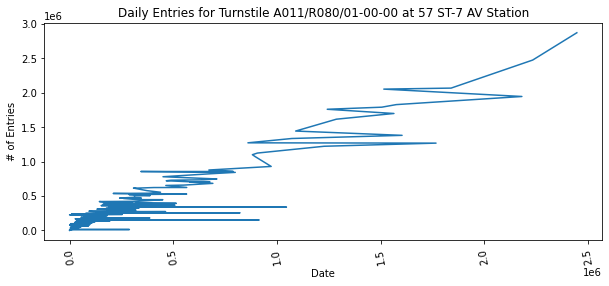

In [76]:
plt.figure(figsize=(10,4));
plt.plot(station_totals['DAILY_EXITS'], station_totals['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('')
plt.xticks(rotation= 100)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station');

In [80]:
station_daily = turnstiles_daily.groupby(["STATION" , "DATE"])[['DAILY_ENTRIES', 'DAILY_EXITS']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,08/27/2016,0.0,0.0
1,1 AV,08/28/2016,13871.0,15717.0
2,1 AV,08/29/2016,18064.0,18982.0
3,1 AV,08/30/2016,19182.0,19715.0
4,1 AV,08/31/2016,19616.0,20518.0


In [101]:
station_daily_Canal_st = station_daily[station_daily['STATION'] == 'CANAL ST'].copy()
station_daily_Canal_st.head(20)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
3570,CANAL ST,08/27/2016,0.0,0.0
3571,CANAL ST,08/28/2016,40988.0,32194.0
3572,CANAL ST,08/29/2016,63916.0,52049.0
3573,CANAL ST,08/30/2016,66957.0,51866.0
3574,CANAL ST,08/31/2016,66784.0,52341.0
3575,CANAL ST,09/01/2016,64761.0,50784.0
3576,CANAL ST,09/02/2016,65861.0,51119.0
3577,CANAL ST,09/03/2016,48039.0,38358.0
3578,CANAL ST,09/04/2016,42289.0,33788.0
3579,CANAL ST,09/05/2016,36220.0,29590.0


Text(0.5, 1.0, 'Daily Entries for Canal_Street Station')

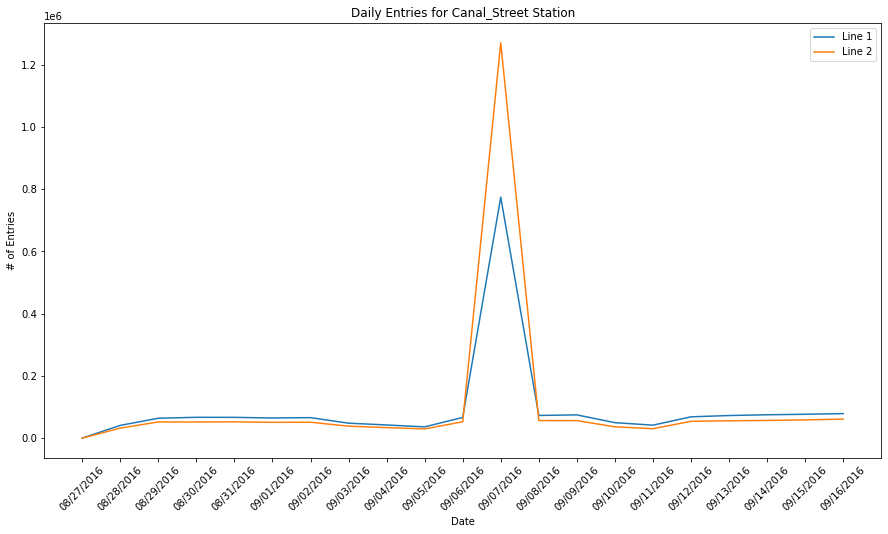

In [102]:
plt.figure(figsize=(15, 8))
plt.plot(station_daily_Canal_st['DATE'], station_daily_Canal_st['DAILY_ENTRIES'], label = 'Line 1')
plt.plot(station_daily_Canal_st['DATE'], station_daily_Canal_st['DAILY_EXITS'], label = 'Line 2')
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.legend()
plt.show
plt.xticks(rotation=45)
plt.title('Daily Entries for Canal_Street Station')